In [204]:
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import csv

In [179]:
#read data
def read_data():
    col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerro_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","class"]
    #print(len(col_names))
    data = pd.read_csv('NormalOrAttackTrain.csv',index_col=False,names=col_names)
    test = pd.read_csv('NormalOrAttackTest.csv',index_col=False,names=col_names)
    #print(data['class'])
    return data,test

In [180]:
def scale_data(x):
    num_col_names=["duration","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerro_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]
    scaler = MinMaxScaler()
    x[num_col_names]=x[num_col_names].astype(float)
    #print(x_train)
    x[num_col_names]=scaler.fit_transform(x[num_col_names])
    #print(x_train)
    return x

In [181]:
#split to attributes and features
def x_y(data):
    x=data.iloc[:,:-1]
    y=data.iloc[:,-1]
    return x,y

In [182]:
#normalize - 0 to 1 range 
def normalize(data,test):
    col_names = ["duration","src_bytes","dst_bytes","wrong_fragment","urgent","hot","num_failed_logins","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","count","srv_count","serror_rate","srv_serror_rate","rerro_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]
    #print(data_)
    data_symbolic = pd.concat([data['protocol_type'],data['service'],data['flag'],data['land'],data['logged_in'],data['is_host_login'],data['is_guest_login'],data['class']],axis=1)
    #print(data_symbolic)
    data=data.drop(['protocol_type','service','flag','land','logged_in','is_host_login','is_guest_login','class'],axis=1)
    #print(data)
    data=preprocessing.normalize(data)
    print(type(data))
    data1 = DataFrame(data,columns=col_names)
    #print(data)
    data=pd.concat([data1,data_symbolic],axis=1)
    #print(data)
    test_symbolic = pd.concat([test['protocol_type'],test['service'],test['flag'],test['land'],test['logged_in'],test['is_host_login'],test['is_guest_login'],test['class']],axis=1)
    test=test.drop(['protocol_type','service','flag','land','logged_in','is_host_login','is_guest_login','class'],axis=1)
    test=preprocessing.normalize(test)
    test1 = DataFrame(test,columns=col_names)
    test=pd.concat([test1,test_symbolic],axis=1)
    #print(test)
    #test=preprocessing.normalize(test)
    return(data,test)

In [6]:
#making mean 0 and sd 1
def standardize(data,test):
    col_names = ["duration","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerro_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]
    #print(data_)
    data_symbolic = pd.concat([data['protocol_type'],data['service'],data['flag'],data['class']],axis=1)
    #print(data_symbolic)
    data=data.drop(['protocol_type','service','flag','class'],axis=1)
    #print(data)
    data=preprocessing.scale(data)
    print(type(data))
    data1 = DataFrame(data,columns=col_names)
    #print(data)
    data=pd.concat([data1,data_symbolic],axis=1)
    #print(data)
    test_symbolic = pd.concat([test['protocol_type'],test['service'],test['flag'],test['class']],axis=1)
    test=test.drop(['protocol_type','service','flag','class'],axis=1)
    test=preprocessing.scale(test)
    test1 = DataFrame(test,columns=col_names)
    test=pd.concat([test1,test_symbolic],axis=1)
    #print(test)
    #test=preprocessing.normalize(test)
    return(data,test)

In [183]:
#getting categories in service col for one hot encoding
def get_value_code(x_train):
    cat=['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
    col=x_train['service']
    cat_list=set(col)
    cat = set(cat)
    final=list(cat.union(cat_list))
    print(len(final))
    #print(cat.difference(cat_list))
    return final

In [215]:
#one hot encode train data
def one_hot_encode_train(x_train,cat):
    x_train=pd.concat([x_train,pd.get_dummies(x_train['protocol_type'])],axis=1)
    x_train.drop(['protocol_type'],axis=1,inplace=True)
    print(x_train.columns.values)
    xt2 = list(x_train['service'])
    t2 = pd.Series(xt2)
    t2 = t2.astype('category',categories=cat)
    dt2 = pd.get_dummies(t2)
    x_train = pd.concat([x_train,dt2],axis=1)
    x_train.drop(['service'],axis=1,inplace=True)
    x_train = pd.concat([x_train,pd.get_dummies(x_train['flag'])],axis=1)
    x_train.drop(['flag'],axis=1,inplace=True)
    #print(x_train)
    #print(x_train.shape)
    return x_train

In [217]:
#one hot encode test data
def one_hot_encode_test(x_test,cat):
    t1 = pd.get_dummies(x_test['protocol_type'])
    x_test = pd.concat([x_test,t1],axis=1)
    x_test.drop(['protocol_type'],axis=1,inplace=True)
    #print(x_test)
    print("length",len(cat))
    xt2 = list(x_test['service'])
   # print(xt2)
    t2 = pd.Series(xt2)
    t2 = t2.astype('category',categories=cat)
    dt2 = pd.get_dummies(t2)
    x_test = pd.concat([x_test,dt2],axis=1)
    x_test.drop(['service'],axis=1,inplace=True)
    #print(x_test.shape)
    #xt3 = x_test.iloc[:,3]
    #print(xt3)
    t3= pd.get_dummies(x_test['flag'])
    x_test = pd.concat([x_test,t3],axis=1)
    x_test.drop(['flag'],axis=1,inplace=True)
    #print(x_test.shape)
    return x_test

In [186]:
#selection of features
def select_features(x_train,y_train):
    selected = SelectPercentile(percentile=43)
    selected.fit(x_train,y_train)
    header=x_train.columns.values.tolist()
    x_train_selected=selected.transform(x_train)
    #print('X train shape:',x_train.shape)
    #print('x train selected shape',x_train_selected.shape)
    mask = selected.get_support()
    #print(mask)
    #print(mask.shape)
    plt.matshow(mask.reshape(1,-1),cmap="gray_r")
    dictionary = dict(zip(header,mask))
    #print(dictionary)
    for cat in dictionary:
        if dictionary[cat]==False:
            x_train=x_train.drop([cat],axis=1)
    return dictionary,x_train,y_train

In [187]:
#remove the unselected features in test data set
def prep_test_data(x_test,dictionary):
    for cat in dictionary:
        if dictionary[cat]==False:
            x_test=x_test.drop([cat],axis=1)
    return x_test

In [12]:
#further reduce test data
def test_data_formulate(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)
    return x_train,x_test,y_train,y_test

In [13]:
#build descion tree classifier
def build_model(x_train,y_train):
    model = tree.DecisionTreeClassifier()
    model = model.fit(x_train,y_train)
    return model

In [201]:
#test descion tree model
def test_model(model,x_test,y_test): 
    y_predict=model.predict(x_test)
    with open('desciontree.csv','w') as writeFile:
        head=['actual','predicted']
        writer = csv.writer(writeFile)
        writer.writerow(head)
        for i,val in enumerate(y_predict):
            #print(y_test.iloc[i])
            lines = [y_test.iloc[i],val]
            #print(lines)
            writer.writerow(lines)
   #print(y_predict)
    writeFile.close()
    print('Accuracy of descion tree model',accuracy_score(y_test,y_predict))

In [15]:
#Read the data set consisting Of Type of attack
def read_detailed_data_Set():
    col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerro_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","class",42]
    print(len(col_names))
    ddata = pd.read_csv('KDDTrain3.csv',names=col_names,index_col=False)
    dtest = pd.read_csv('KDDTest3.csv',names=col_names,index_col=False)
    #print(data['class'])
    ddata=ddata.drop([42],axis=1)
    dtest=dtest.drop([42],axis=1)
    return ddata,dtest

In [16]:
def nb_build(x_train,y_train):
    nB1 = GaussianNB()
    nB1.fit(x_train,y_train)
    return nB1

In [17]:
def nb_predict(x_test,y_test,classifier):
    y_predict=classifier.predict(x_test)
    return y_predict

In [190]:
def multi_level_naive_bayes(x_train,y_train,x_test,y_test):
    descion_tree_results = pd.read_csv('desciontree.csv')
    descion_predict = list(descion_tree_results['predicted'])
    print(type(descion_predict))
    classifier1=nb_build(x_train,y_train)
    #print(x_test)
    y_test_list = y_test.values.tolist()
    nb_result = DataFrame(columns=['Predicted'])
    #print(x_test.iloc[19329,:])
    x_test_copy=x_test
    count=0
    for i in range(len(x_test.index)):
        if descion_predict[i]=='normal':
            x_test_copy=x_test_copy.drop(i)
            count=count+1
        #print(count)
    #print(len(x_test_copy.index))
        elif descion_predict[i] == 'anomaly':
           # print(i)
            att = list(x_test.iloc[i,:])
            att = [att]
            #print(att)
            #att = att.reshape(1,-1)
            target = y_test_list[i]
            y_predict=nb_predict(att,target,classifier1)
            if y_predict == 'normal':
                #print(i)
                #print(x_test.iloc[i,:])
                #print(y_predict)
                nb_result.loc[i,'Predicted'] = y_predict[0]
                x_test_copy=x_test_copy.drop(i)
    normal_list_train=list()
    print(count)
    for i,val in enumerate(y_train):
        if val=='normal':
            normal_list_train.append(i)
    x_train=x_train.drop(x_train.index[normal_list_train])
    y_train=y_train.drop(y_train.index[normal_list_train])
    #print(y_train)
    classifier2=nb_build(x_train,y_train)
    x_test=x_test_copy
    for index, row in x_test.iterrows():
        att = list(row)
        att = [att]
        target = y_test.loc[index]
        y_predict = nb_predict(att,target,classifier2)
        if y_predict == 'dos':
            nb_result.loc[index,'Predicted'] = y_predict[0]
            #print(y_predict)
            #print(index)
            x_test_copy = x_test_copy.drop(index)
    dos_list_train = list()
    for i,val in enumerate(y_train):
        if val=='dos':
            dos_list_train.append(i)
    x_train=x_train.drop(x_train.index[dos_list_train])
    y_train=y_train.drop(y_train.index[dos_list_train])
    classifier3 = nb_build(x_train,y_train)
    x_test=x_test_copy
    for index, row in x_test.iterrows():
        att = list(row)
        att = [att]
        target = y_test.loc[index]
        y_predict = nb_predict(att,target,classifier3)
        if y_predict == 'r2l':
            nb_result.loc[index,'Predicted'] = y_predict[0]
            #print(y_predict)
            #print(index)
            x_test_copy = x_test_copy.drop(index)
    r2l_list_train = list()
    for i,val in enumerate(y_train):
        if val=='r2l':
            r2l_list_train.append(i)
    #print(len(x_test_copy))
    x_train=x_train.drop(x_train.index[r2l_list_train])
    y_train=y_train.drop(y_train.index[r2l_list_train])
    classifier4 = nb_build(x_train,y_train)
    x_test=x_test_copy
    for index, row in x_test.iterrows():
        att = list(row)
        att = [att]
        target = y_test.loc[index]
        y_predict = nb_predict(att,target,classifier4)
        nb_result.loc[index,'Predicted']=y_predict[0]
    #print(y_train)
        #break
    #print(nb_result)
    descion_normal = descion_tree_results[descion_tree_results['predicted'] == 'normal']
    nb_result = pd.concat([nb_result['Predicted'],descion_normal['predicted']],axis=0)
   # print(nb_result)
    return(nb_result)
    #print(len(x_test_copy.index))
    #print(x_test_copy)
    #print("hello")
    #print(nb_result)
    #print(x_test_copy)
        #print(x_test.iloc[i,:])
        #print(nb_result)

In [142]:
def sort_results(res):
    res = DataFrame(res)
    #print(res)
    res=res.sort_index()
    return res

In [164]:
def write_results_to_file(res,y_actual):
    with open('naivebayes.csv','w') as writeFile:
        head=['actual','predicted']
        writer = csv.writer(writeFile)
        writer.writerow(head)
        for i,val in res.iterrows():
            #print(y_test.iloc[i])
            lines = [y_actual.iloc[i],res.iloc[i,0]]
            #print(lines)
            writer.writerow(lines)
   #print(y_predict)
    writeFile.close()

In [198]:
def write_results_comb(res,y_actual):
    with open('AttackOrNormal.csv','w') as writeFile:
        head=['actual','predicted']
        writer = csv.writer(writeFile)
        writer.writerow(head)
        for i,val in res.iterrows():
            if res.iloc[i,0] != 'normal':
                res.iloc[i,0] = 'anomaly'
            lines=[y_actual.iloc[i],res.iloc[i,0]]
            writer.writerow(lines)
        writeFile.close()

In [209]:
def accuracy(filename):
    res = pd.read_csv(filename)
    print(classification_report(res['actual'],res['predicted']))
    print('COnfusion Matrix',confusion_matrix(res['actual'],res['predicted']))
    return(accuracy_score(res['actual'],res['predicted']))

<class 'numpy.ndarray'>
70
['duration' 'src_bytes' 'dst_bytes' 'wrong_fragment' 'urgent' 'hot'
 'num_failed_logins' 'num_compromised' 'root_shell' 'su_attempted'
 'num_root' 'num_file_creations' 'num_shells' 'num_access_files'
 'num_outbound_cmds' 'count' 'srv_count' 'serror_rate' 'srv_serror_rate'
 'rerro_rate' 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate'
 'srv_diff_host_rate' 'dst_host_count' 'dst_host_srv_count'
 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'service' 'flag' 'land' 'logged_in'
 'is_host_login' 'is_guest_login' 'icmp' 'tcp' 'udp']


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  # This is added back by InteractiveShellApp.init_path()


length 70


/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [14] are constant.
  UserWarning)
/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy of descion tree model 0.7755943931866572
43
<class 'numpy.ndarray'>
70
['duration' 'src_bytes' 'dst_bytes' 'wrong_fragment' 'urgent' 'hot'
 'num_failed_logins' 'num_compromised' 'root_shell' 'su_attempted'
 'num_root' 'num_file_creations' 'num_shells' 'num_access_files'
 'num_outbound_cmds' 'count' 'srv_count' 'serror_rate' 'srv_serror_rate'
 'rerro_rate' 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate'
 'srv_diff_host_rate' 'dst_host_count' 'dst_host_srv_count'
 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'service' 'flag' 'land' 'logged_in'
 'is_host_login' 'is_guest_login' 'icmp' 'tcp' 'udp']
length 70


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  # This is added back by InteractiveShellApp.init_path()
/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [14] are constant.
  UserWarning)
/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


<class 'list'>
14188
<class 'pandas.core.series.Series'>
              precision    recall  f1-score   support

         dos       0.88      0.72      0.79      7460
      normal       0.66      0.97      0.79      9711
       probe       0.74      0.43      0.54      2421
         r2l       0.09      0.02      0.03      2885
         u2r       0.56      0.21      0.30        67

   micro avg       0.71      0.71      0.71     22544
   macro avg       0.59      0.47      0.49     22544
weighted avg       0.67      0.71      0.66     22544

COnfusion Matrix [[5364 1482   20  592    2]
 [ 189 9456   56    8    2]
 [ 534  844 1039    4    0]
 [   0 2532  285   61    7]
 [   0   48    0    5   14]]
Accuracy after nb: 0.7067955997161107
              precision    recall  f1-score   support

     anomaly       0.97      0.62      0.75     12833
      normal       0.66      0.97      0.79      9711

   micro avg       0.77      0.77      0.77     22544
   macro avg       0.81      0.80      0

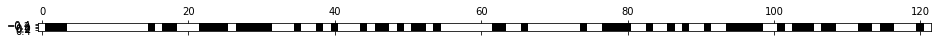

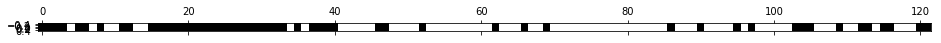

In [222]:
def main():
    data,test=read_data()
    data,test=normalize(data,test)
   # print(data['logged_in'])
    #print(data.iloc[0,:])
    #data,test=standardize(data,test)
    #print(data.iloc[0,:])
    x_train,y_train=x_y(data)
    x_test,y_test=x_y(test)
    x_train=scale_data(x_train)
    x_test=scale_data(x_test)
    cat=get_value_code(x_train)
    x_train=one_hot_encode_train(x_train,cat)
    x_test = one_hot_encode_test(x_test,cat)
    x_test_h = x_test.columns.values.tolist()
    dictionary,x_train,y_train=select_features(x_train,y_train)
    x_test = prep_test_data(x_test,dictionary)
    #x1,x_test,y1,y_test=test_data_formulate(x_test,y_test)
    desmodel = build_model(x_train,y_train)
    test_model(desmodel,x_test,y_test)
    ddata,dtest=read_detailed_data_Set()
    ddata,dtest=normalize(ddata,dtest)
    x_traind,y_traind=x_y(ddata)
    x_testd,y_testd=x_y(dtest)
    x_traind=scale_data(x_traind)
    x_testd=scale_data(x_testd)
    cat=get_value_code(x_traind)
    x_traind=one_hot_encode_train(x_traind,cat)
    x_testd = one_hot_encode_test(x_testd,cat)
    x_testd_h = x_testd.columns.values.tolist()
    dictionary,x_traind,y_traind=select_features(x_traind,y_traind)
    x_testd = prep_test_data(x_testd,dictionary)
    #print(y_testd)
    naive_bayes_result=multi_level_naive_bayes(x_traind,y_traind,x_testd,y_testd)
    sorted_nb_res = sort_results(naive_bayes_result)
    print(type(y_testd))
    y_testd_list = y_test.values.tolist()
    write_results_to_file(sorted_nb_res,y_testd)
    #print(sorted_nb_res)
    accuracy_nb=accuracy('naivebayes.csv')
    print('Accuracy after nb:',accuracy_nb)
    write_results_comb(sorted_nb_res,y_test)
    acc=accuracy('AttackOrNormal.csv')
    print('Accuracy for normal & attack type:',acc)
    #accuracy(y_testd,sorted_nb_res)
main()